In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tools import parse_file, rescale, center, gen_borders, gen_grid
from interpol import idw_mesh

In [14]:
points = center(rescale(parse_file('../resources/demo4.mod1')))

In [15]:
points

array([[1.        , 1.        , 0.4       ],
       [0.66666667, 0.66666667, 1.        ],
       [0.66666667, 1.33333333, 1.        ],
       [1.33333333, 0.66666667, 1.        ],
       [1.33333333, 1.33333333, 1.        ]])

Centered and rescaled points are always within $[0, 2]$ boundary. Let's start by creating 4x4 grid in this bounds.

array([[0.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.        ],
       [0.        , 1.33333333, 0.        ],
       [0.        , 2.        , 0.        ],
       [0.66666667, 0.        , 0.        ],
       [0.66666667, 0.66666667, 0.        ],
       [0.66666667, 1.33333333, 0.        ],
       [0.66666667, 2.        , 0.        ],
       [1.33333333, 0.        , 0.        ],
       [1.33333333, 0.66666667, 0.        ],
       [1.33333333, 1.33333333, 0.        ],
       [1.33333333, 2.        , 0.        ],
       [2.        , 0.        , 0.        ],
       [2.        , 0.66666667, 0.        ],
       [2.        , 1.33333333, 0.        ],
       [2.        , 2.        , 0.        ]])

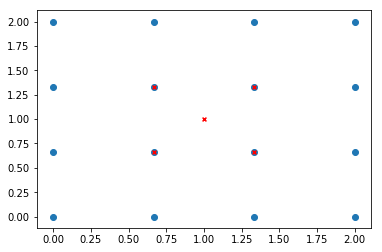

In [29]:
x_grid = np.linspace(0, 2, 4)
y_grid = np.linspace(0, 2, 4)
xy = np.array([[x, y] for x in x_grid for y in y_grid])
grid = np.hstack((xy, np.zeros(xy.shape[0])[:, None]))
plt.scatter(grid[:, 0], grid[:, 1]);
plt.scatter(points[:, 0], points[:, 1], c='red', s=15, marker='x')
grid

In [30]:
d = lambda p1, p2: (p1 - p2) @ (p1 - p2)

In [37]:
grid

array([[0.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.        ],
       [0.        , 1.33333333, 0.        ],
       [0.        , 2.        , 0.        ],
       [0.66666667, 0.        , 0.        ],
       [0.66666667, 0.66666667, 0.        ],
       [0.66666667, 1.33333333, 0.        ],
       [0.66666667, 2.        , 0.        ],
       [1.33333333, 0.        , 0.        ],
       [1.33333333, 0.66666667, 0.        ],
       [1.33333333, 1.33333333, 0.        ],
       [1.33333333, 2.        , 0.        ],
       [2.        , 0.        , 0.        ],
       [2.        , 0.66666667, 0.        ],
       [2.        , 1.33333333, 0.        ],
       [2.        , 2.        , 0.        ]])